_Студент: Киселева Елена_

In [2]:
import re

## Методы модуля re

### Задача 1

В этом примере мы собираемся использовать фактический результат сеанса отладки Android adb. Ваша цель извлечение имени файла, имени метода и номера строки строки трассировки стека (они следуют за формой "at package.class.methodname(filename: linenumber)" ).

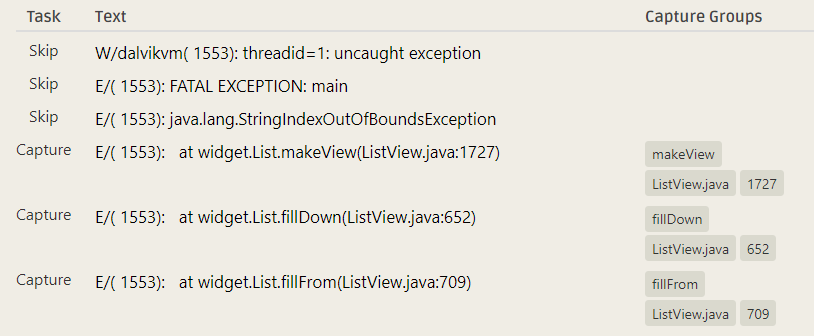

In [5]:
strings_1 = ['E( 1553): at widget.List.makeView(ListView.java:1727)',
             'E( 1553): at widget.List.fillDown(ListView.java:652)',
             'E( 1553): at widget.List.fillFrom(ListView.java:709)',
             'W/dalvikvm( 1553: threading=1:uncaught exception',
             'E( 1553): FATAL EXCEPTION:main',
             'E( 1553): java.lang.StringIndexOut OfBoundsException']

for s in strings_1:
    print(re.findall(r'List\.+?(\w*)\(?(\w*\.\w*):(\d*)\)$', s))
    
# Или так
for s in strings_1:
    result = re.findall(r'List\.+?(\w*)\(?(\w*\.\w*):(\d*)\)$', s)
    if result:
        filename, modulename, linenumber = result[0]
        print(f'{filename}  {modulename}  {linenumber}')

[('makeView', 'ListView.java', '1727')]
[('fillDown', 'ListView.java', '652')]
[('fillFrom', 'ListView.java', '709')]
[]
[]
[]
makeView  ListView.java  1727
fillDown  ListView.java  652
fillFrom  ListView.java  709


### Задача 2

При работе с файлами и ресурсами по сети вы часто сталкиваетесь с URI и URL, которые можно анализировать и работать напрямую. В большинстве стандартных библиотек есть классы для анализа и создания идентификаторов такого типа, но если вам нужно сопоставить их в журналах или в большом текстовом корпусе, вы можете использовать регулярные выражения для извлечения информации из их структурированного формата довольно легко.

URI, или Унифицированные идентификаторы ресурса, являются представлением ресурса, который обычно состоит из протокола, хоста, порта (необязательно) и пути ресурса, соответственно выделенных ниже.

http://source.com:80/page
Схема описывает протокол для связи (http), хост (source.com) и порт (80) описывают источник ресурса, а полный путь (page) описывает местоположение в источнике для ресурса.

В приведенном ниже упражнении попробуйте извлечь протокол, хост и порт из всех перечисленных ресурсов.

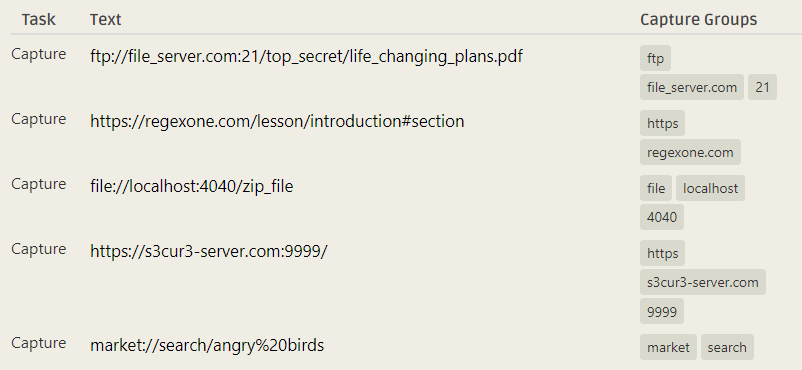

In [11]:
strings_2 = ['ftp://file_server.com:21/top_secret/life_changing_plans.pdf',
             'https://regexone.com/lesson/introduction#section',
             'file://localhost:4040/zip_file',
             'https://s3cur3-server.com/9999',
             'market://search/angry%20birds']

for s in strings_2:
    print(re.findall(r'(^\w*)://(.[^/|:]*):?(\d[^/]*)?', s))
print()

# или так
for s in strings_2:
    protocol = re.search(r'^\w*(?=:)', s).group(0)
    host = re.search(r'(?<=://)(.[^/|:]*)', s).group(0)
    port = re.search(r'(?<=:)(\d*[^/])', s)
    port = port.group(0) if port else ''
    print(protocol, host, port, sep=', ')

[('ftp', 'file_server.com', '21')]
[('https', 'regexone.com', '')]
[('file', 'localhost', '4040')]
[('https', 's3cur3-server.com', '')]
[('market', 'search', '')]

ftp, file_server.com, 21
https, regexone.com, 
file, localhost, 4040
https, s3cur3-server.com, 
market, search, 


### Задача 3

Напишите программу для проверки является ли содержание строки дробным числом с точностью до 2.

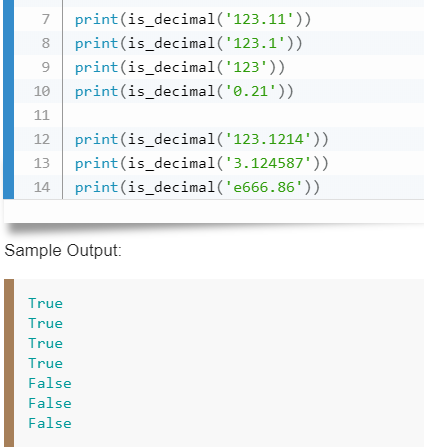

In [14]:
def is_decimal(string):
    return bool(re.fullmatch(r'^\d+\.?\d{,2}', string))

strings_3 = ['123.11', '123.1', '123', '0.21', '123.1214', '3.124578', 'e666.86']

for s in strings_3:
    print(is_decimal(s))

True
True
True
True
False
False
False


### Задача 4

Напишите программу для удаления области скобок в строке. Пример: "Python(Prog lang) is #1" -> "Python  is #1"

In [5]:
string_4 = 'Python(Prog lang) is #1'
print(re.sub(r'\(.*\)', '', string_4))

Python is #1


### Задача 5

Напишите программу для вставки пробелов перед заглавными буквами в строке. Пример: "PythonExercisesPracticeSolution" -> "Python Exercises Practice Solution"

In [15]:
string_5 = 'PythonExercisesPracticeSolution'
print(' '.join(re.findall(r'([A-Z][^A-Z]*)', string_5)))

# или так
print(' '.join([item for item in re.split(r'([A-Z][^A-Z]*)', string_5)
               if item]))

Python Exercises Practice Solution
Python Exercises Practice Solution
